In [3]:
# Install the required libraries
!pip install prophet
!pip install hvplot
!pip install pandas_profiling --upgrade

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/262.6 kB ? eta -:--:--
   ------------------------------- -------- 204.8/262.6 kB 6.3 MB/s eta 0:00:01
   ---------------------------------------- 262.6/262.6 kB 4.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/4.7 MB ? eta -:--:--
   --- ------------------------------------ 0.4/4.7 MB 11.2 MB/s eta 0:00:01
   ----- ---------------------------------- 0.7/4.7 MB 10.9 MB/s eta 0:00:01
   ----------- ---------------------------- 1.4/4.7 MB 11.1 MB/s eta 0:00:01
   ---------------- ----------------------- 1.9/4.7 MB 11.1 MB/s eta 0:00:01
   --------------------- ------------------ 2.5/4.7 MB 11.4 MB/s eta 0:00:01
   ------------------------- -------------- 3.1/4.7 MB 11.5 MB/s eta 0:00:01
   ------------------------------ --------- 3.6/4.7 MB 11.5 MB/s eta 0:00:01
   ----------------------------------- ---- 4.2/4.7 MB 11.5

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-learn 1.4.2 requires joblib>=1.2.0, but you have joblib 1.1.1 which is incompatible.


In [56]:
# Import the required libraries and dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
import hvplot.pandas
import datetime as dt
import numpy as np
%matplotlib inline
from matplotlib import style 
plt.style.use("ggplot")

In [60]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [65]:
def plot_graph(df, title:str, y_label: str):    
        ## graphing the data

    cols =[col for col in df.columns]

    fig,ax = plt.subplots(1,1, figsize = (14,6))
    plt.style.use("seaborn-v0_8")

    for c in cols: 
        ax.plot(c, linewidth=2, data=df)
        ax.set_title(title)
        plt.xlabel("Date")
        plt.ylabel(y_label)

        handles,labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, loc="upper left", prop = {"size":10})

    plt.show()

In [71]:
df_inflationrates = pd.read_csv('../Resources/Data/US_inflation_rates.csv')
df_inflationrates.head()


,date,value
0,1/1/1947,21.48
1,2/1/1947,21.62
2,3/1/1947,22.00
3,4/1/1947,22.00
4,5/1/1947,21.95


//todo.. Convert date column to datetime, filter date range

In [72]:
filtered_df = df_inflationrates[df_inflationrates['date'] >= '2015-01-02']
filtered_df.head()

,date,value
2,3/1/1947,22.00
3,4/1/1947,22.00
4,5/1/1947,21.95
5,6/1/1947,22.08
6,7/1/1947,22.23


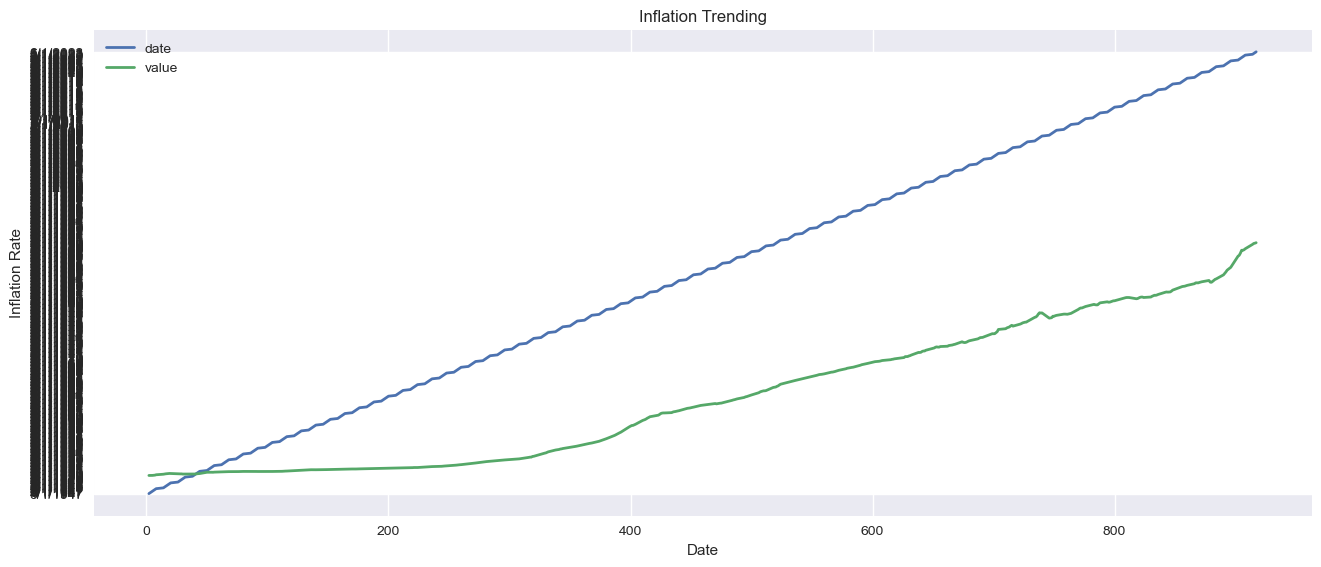

In [ ]:

plot_graph(filtered_df, title="Inflation Trending", y_label="Inflation Rate")

In [47]:
df_standardbasket = pd.read_csv('../Resources/Data/CPI_StandardBasket.csv')
df_standardbasket.head()

,DATE,FPCPITOTLZGUSA
0,1960-01-01,1.457976
1,1961-01-01,1.070724
2,1962-01-01,1.198773
3,1963-01-01,1.239669
4,1964-01-01,1.278912


C:\Users\37065890\AppData\Local\Temp\ipykernel_14872\3283324454.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.axes.set_xticklabels(labels)


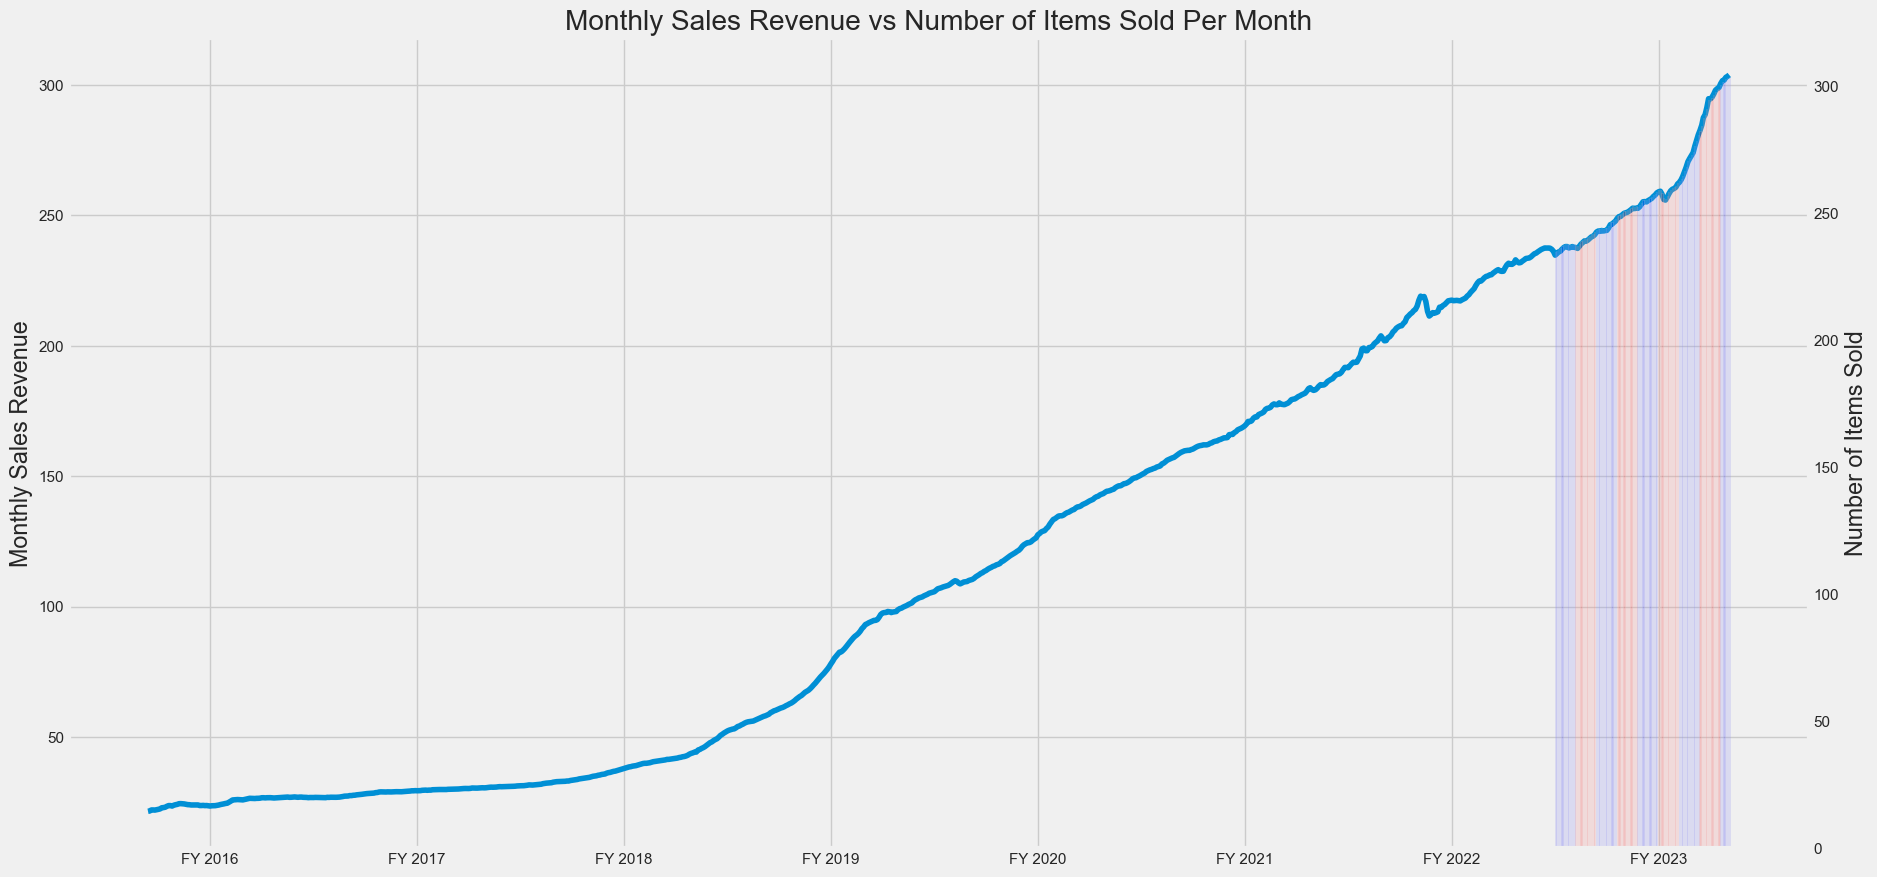

In [50]:
plt.rcParams['figure.figsize']=(20,10) # set the figure size
plt.style.use('fivethirtyeight') # using the fivethirtyeight matplotlib theme
df_inflationrates.date = pd.to_datetime(df_inflationrates.date) #set the date column to datetime
df_inflationrates.set_index('date', inplace=True) #set the index to the date column
fy15_all = df_inflationrates[(df_inflationrates.index >= '2015-01-01') & (df_inflationrates.index < '2016-01-01')]
fy16_all = df_inflationrates[(df_inflationrates.index >= '2016-01-01') & (df_inflationrates.index < '2017-01-01')]
fy17_all = df_inflationrates[(df_inflationrates.index >= '2017-01-01') & (df_inflationrates.index < '2018-01-01')]
fy18_all = df_inflationrates[(df_inflationrates.index >= '2018-01-01') & (df_inflationrates.index < '2019-01-01')]
fy19_all = df_inflationrates[(df_inflationrates.index >= '2019-01-01') & (df_inflationrates.index < '2020-01-01')]
fy20_all = df_inflationrates[(df_inflationrates.index >= '2020-01-01') & (df_inflationrates.index < '2021-01-01')]
fy21_all = df_inflationrates[(df_inflationrates.index >= '2021-01-01') & (df_inflationrates.index < '2022-01-01')]
fy22_all = df_inflationrates[(df_inflationrates.index >= '2022-01-01') & (df_inflationrates.index < '2023-01-01')]
fy23_all = df_inflationrates[(df_inflationrates.index >= '2023-01-01') & (df_inflationrates.index < '2024-01-01')]
# Let's build our plot
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()  # set up the 2nd axis
ax1.plot(df_inflationrates.value) #plot the value on axis #1
# the next few lines plot the fiscal year data as bar plots and changes the color for each.
ax2.bar(fy15_all.index, fy15_all.value,width=20, alpha=0.2, color='blue')
ax2.bar(fy16_all.index, fy16_all.value,width=20, alpha=0.2, color='red')
ax2.bar(fy17_all.index, fy17_all.value,width=20, alpha=0.2, color='blue')
ax2.bar(fy18_all.index, fy18_all.value,width=20, alpha=0.2, color='red')
ax2.bar(fy19_all.index, fy19_all.value,width=20, alpha=0.2, color='blue')
ax2.bar(fy20_all.index, fy20_all.value,width=20, alpha=0.2, color='red')
ax2.bar(fy21_all.index, fy21_all.value,width=20, alpha=0.2, color='blue')
ax2.bar(fy22_all.index, fy22_all.value,width=20, alpha=0.2, color='red')
ax2.bar(fy23_all.index, fy23_all.value,width=20, alpha=0.2, color='blue')
ax2.grid(False) # turn off grid #2
ax1.set_title('Monthly Sales Revenue vs Number of Items Sold Per Month')
ax1.set_ylabel('Monthly Sales Revenue')
ax2.set_ylabel('Number of Items Sold')
# Set the x-axis labels to be more meaningful than just some random dates.
labels = ['FY 2015', 'FY 2016','FY 2017', 'FY 2018','FY 2019', 'FY 2020', 'FY 2021', 'FY 2022', 'FY 2023']
ax1.axes.set_xticklabels(labels)
plt.show()
